<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/tmp/wsuser/ipykernel_1512/3686436567.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'].dropna(), shade=True, color='blue')


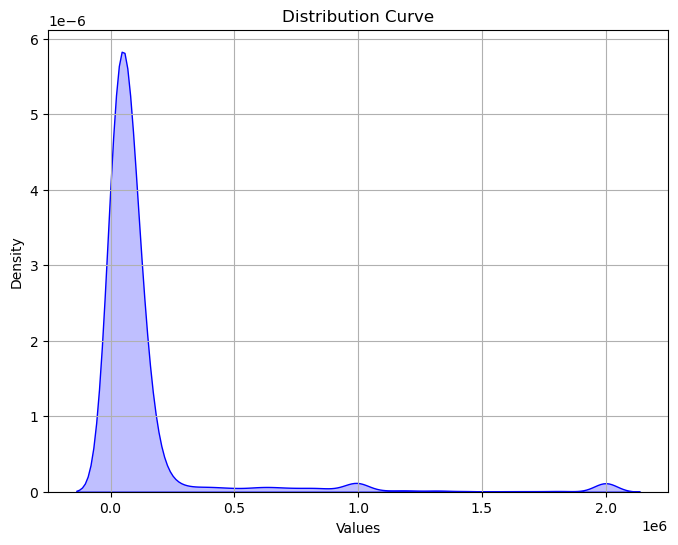

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --upgrade pandas seaborn

plt.figure(figsize=(8, 6))
sns.kdeplot(df['ConvertedComp'].dropna(), shade=True, color='blue')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution Curve')
plt.grid(True)
plt.show()


Plot the histogram for the column `ConvertedComp`.


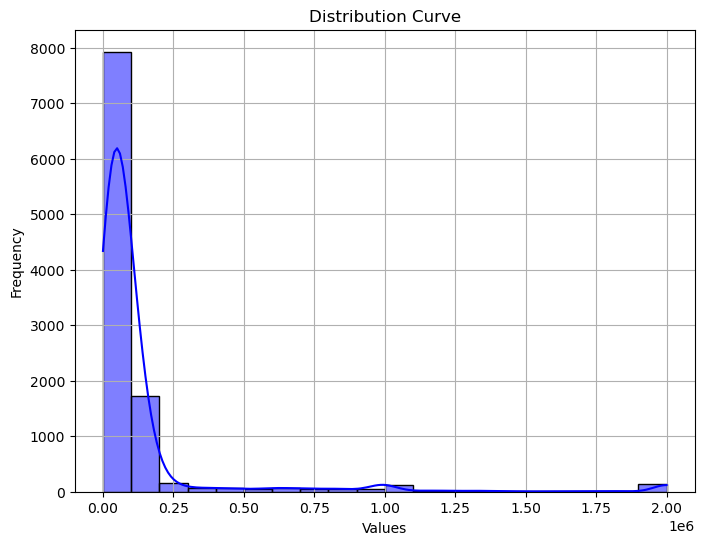

In [4]:
# your code goes here
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['ConvertedComp'], kde=True, color='blue', bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Curve')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
import numpy as np
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
df['Gender'].loc[df['Gender']=='Man'].count()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
df['Gender'].loc[df['Gender']=='Woman'].count()

731

In [12]:
df['Gender'].count()

11325

In [13]:
df['ConvertedComp'].loc[df['Gender']=='Woman'].median()

57708.0

Give the five number summary for the column `Age`?


In [14]:
# Assuming you have a DataFrame 'df' with the column 'Age'
five_number_summary = df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]
print(five_number_summary)

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


Plot a histogram of the column `Age`.


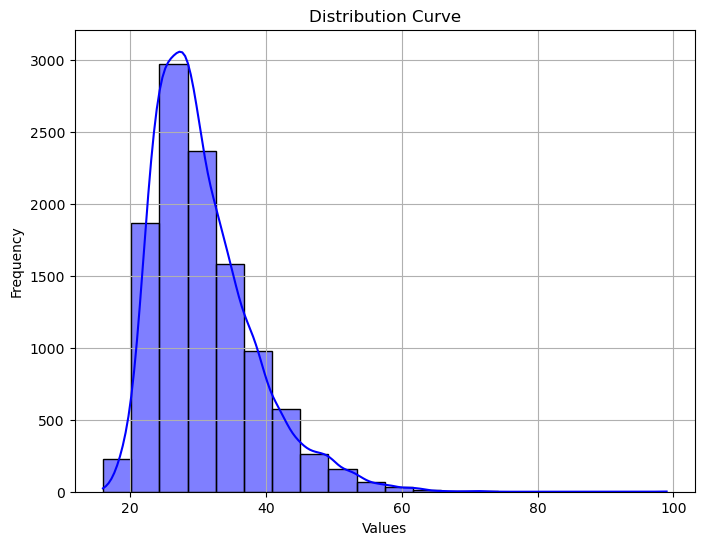

In [15]:
# your code goes here
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='blue', bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Curve')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


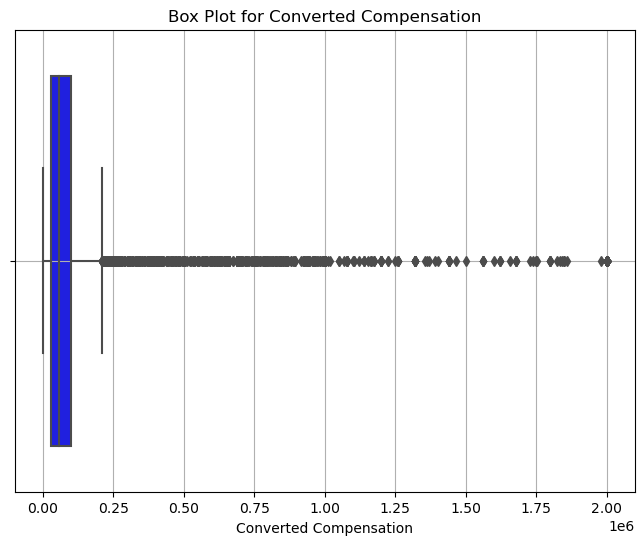

In [16]:
# your code goes here

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedComp'], color='blue')
plt.xlabel('Converted Compensation')
plt.title('Box Plot for Converted Compensation')
plt.grid(True)
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
# your code goes here
column = df['ConvertedComp']

# Calculate the first quartile (Q1)
Q1 = column.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = column.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)


Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [18]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-82830.0, 209698.0)

In [22]:
df['ConvertedComp'].median()

57745.0

Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
# your code goes here
column = df['ConvertedComp']
outliers_count = ((column < lower_bound) | (column > upper_bound)).sum()
outliers_count

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [21]:
# your code goes here
new_df = df[(column >= lower_bound) & (column <= upper_bound)]

In [23]:
new_df['ConvertedComp'].median()

52704.0

In [25]:
new_df['ConvertedComp'].mean()

59883.20838915799

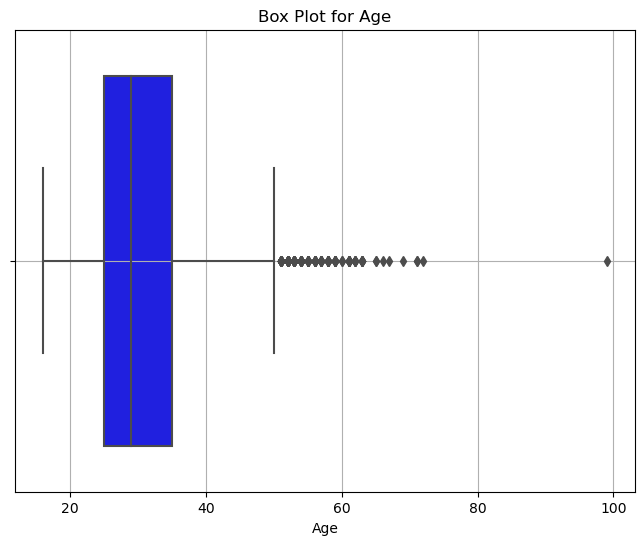

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='blue')
plt.xlabel('Age')
plt.title('Box Plot for Age')
plt.grid(True)
plt.show()


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here

numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation between 'Age' and other numeric columns
correlation_matrix = numeric_columns.corr(method='pearson')

# Extract the correlation values of 'Age' with other columns
age_correlation = correlation_matrix['Age'].drop('Age')

print(age_correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
